# 0. Librerias

Para correr en Colab L4

In [ ]:
import subprocess
import sys

def install(cmd):
    subprocess.check_call([sys.executable, "-m", "pip", "install"] + cmd.split())

print("🧹 Limpiando...")
subprocess.run("pip uninstall -y torch torchvision torchaudio triton bitsandbytes transformers accelerate datasets huggingface_hub peft trl", shell=True)
subprocess.run("pip cache purge", shell=True)

print("🔥 Instalando PyTorch 2.3.1 + CUDA 12.1...")
subprocess.run(
    "pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121",
    shell=True
)

print("🔧 Triton + BitsAndBytes...")
install("triton==2.3.1")
install("bitsandbytes==0.43.1")

print("📦 HuggingFace stack...")
install("transformers==4.44.2 accelerate==0.33.0 datasets==2.20.0 peft==0.12.0 trl==0.9.6")

print("📝 Extras...")
install("numpy==1.26.4 pandas==2.2.2 protobuf==3.20.* textstat bert-score nltk jsonlines")

print("🔍 AlignScore...")
subprocess.run('pip install "git+https://github.com/yuh-zha/AlignScore.git@main" --no-deps', shell=True)

# Verificar
import torch
print(f"\n✅ PyTorch: {torch.__version__}")
print(f"✅ CUDA: {torch.cuda.is_available()}")
print(f"✅ GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'N/A'}")

print("\n⚠️  REINICIA EL RUNTIME AHORA!")

🧹 Limpiando...
🔥 Instalando PyTorch 2.3.1 + CUDA 12.1...
🔧 Triton + BitsAndBytes...
📦 HuggingFace stack...
📝 Extras...
🔍 AlignScore...

✅ PyTorch: 2.3.1+cu121
✅ CUDA: True
✅ GPU: NVIDIA L4

⚠️  REINICIA EL RUNTIME AHORA!


Reiniciar

In [ ]:

!pip install pytorch-lightning==1.9.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 52.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignscore 0.1.3 requires jsonlines<3,>=2.0.0, but you have jsonlines 4.0.0 which is incompatible.
alignscore 0.1.3 requires protobuf<=3.20, but you have protobuf 3.20.3 which is incompatible.
alignscore 0.1.3 requires torch<2,>=1.12.1, but you have torch 2.3.1+cu121 which is incompatible.


In [ ]:
import sys
import torch
import transformers
import trl
import peft
import bitsandbytes as bnb
import accelerate
import datasets

print("==========================================")
print("📌 PYTHON")
print("==========================================")
print("Python version:", sys.version)
print()

print("==========================================")
print("🔥 PYTORCH")
print("==========================================")
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA device:", torch.cuda.get_device_name(0))
    print("CUDA capability:", torch.cuda.get_device_capability(0))
print("Torch path:", torch.__file__)
print()

print("==========================================")
print("🧩 TRANSFORMERS / PEFT / TRL / HF STACK")
print("==========================================")
print("Transformers:", transformers.__version__)
print("Accelerate:  ", accelerate.__version__)
print("Datasets:    ", datasets.__version__)
print("PEFT:        ", peft.__version__)
print("TRL:         ", trl.__version__)
print("BNB:         ", bnb.__version__)
print()

print("==========================================")
print("🧪 BITSANDBYTES TEST: 4-bit kernels")
print("==========================================")
try:
    test_tensor = torch.randn(1, 1).cuda()
    from bitsandbytes.nn import Linear4bit
    layer = Linear4bit(1, 1, bias=False).cuda()
    out = layer(test_tensor)
    print("BNB 4-bit: OK ✔️")
except Exception as e:
    print("BNB 4-bit: ❌ FAILED")
    print(e)
print()

print("==========================================")
print("🧪 VALUE HEAD COMPATIBILITY (TRL PPO clásico)")
print("==========================================")
from trl import AutoModelForCausalLMWithValueHead
print("Value Head import: OK ✔️")
print()

print("==========================================")
print("🧪 ALIGN SCORE")
print("==========================================")
try:
    from alignscore import AlignScore
    scorer = AlignScore(
        model='roberta-base',
        batch_size=2,
        device=0 if torch.cuda.is_available() else -1,
        ckpt_path='https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt',
        evaluation_mode='nli_sp',
        verbose=False
    )
    print("AlignScore: OK ✔️")
except Exception as e:
    print("AlignScore: ❌ FAILED")
    print(e)
print()

print("==========================================")
print("🏁 FINAL RESULT")
print("==========================================")
print("🚀 Entorno listo para QLoRA + PPO clásico + AlignScore")
print("==========================================")



📌 PYTHON
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

🔥 PYTORCH
Torch version: 2.3.1+cu121
CUDA available: True
CUDA device: NVIDIA L4
CUDA capability: (8, 9)
Torch path: /usr/local/lib/python3.12/dist-packages/torch/__init__.py

🧩 TRANSFORMERS / PEFT / TRL / HF STACK
Transformers: 4.44.2
Accelerate:   0.33.0
Datasets:     2.20.0
PEFT:         0.12.0
TRL:          0.9.6
BNB:          0.43.1

🧪 BITSANDBYTES TEST: 4-bit kernels
BNB 4-bit: OK ✔️

🧪 VALUE HEAD COMPATIBILITY (TRL PPO clásico)
Value Head import: OK ✔️

🧪 ALIGN SCORE


/usr/local/lib/python3.12/dist-packages/bitsandbytes/autograd/_functions.py:569: UserWarning: Some matrices hidden dimension is not a multiple of 64 and efficient inference kernels are not supported for these (slow). Matrix input size found: torch.Size([1, 1])
  warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Downloading: "https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt" to /root/.cache/torch/hub/checkpoints/AlignScore-base.ckpt
100%|██████████| 1.83G/1.83G [00:07<00:00, 260MB/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt`
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should p

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


AlignScore: OK ✔️

🏁 FINAL RESULT
🚀 Entorno listo para QLoRA + PPO clásico + AlignScore


Reiniciar

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 1. Crear carpeta y entrar
!mkdir cochrane_data
%cd cochrane_data

# 2. Inicializar git vacío
!git init

# 3. Agregar remote
!git remote add -f origin https://github.com/feliperussi/bridging-the-gap-in-health-literacy.git

# 4. Activar modo sparse checkout
!git config core.sparseCheckout true

# 5. Indicar SOLO las carpetas que queremos
!echo "data_collection_and_processing/Data Sources/Cochrane/train/pls" >> .git/info/sparse-checkout
!echo "data_collection_and_processing/Data Sources/Cochrane/train/non_pls" >> .git/info/sparse-checkout

# 6. Descargar solo esa parte del repo
!git pull origin main

/content/cochrane_data
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/cochrane_data/.git/
Updating origin
remote: Enumerating objects: 72074, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 72074 (delta 0), reused 2 (delta 0), pack-reused 72071 (from 2)
Receiving objects: 100% (72074/72074), 315.90 MiB | 16.10 MiB/s, done.
Resolving deltas: 100% (2991/2991), done.
From https://github.com/feliperussi/bridging-the-gap-in-health-literacy
 * [new branch]

In [ ]:
import os
os.environ["HF_TOKEN"] = "hfxxxxxxxxxxxxxxxxx"

In [ ]:
from huggingface_hub import login
login(token=os.environ["HF_TOKEN"])

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments
from peft import LoraConfig, get_peft_model
import glob, pandas as pd
import transformers, trl, peft, accelerate, datasets
import bitsandbytes as bnb
import re

## Construir el dataset non_pls → pls desde las carpetas de GitHub

In [ ]:
#Numero de Pares

In [ ]:

# Número máximo de pares
pares = 2000

# === 1️⃣ Listar archivos ===
pls_files = sorted(glob.glob("data_collection_and_processing/Data Sources/Cochrane/train/pls/*.txt"))
non_pls_files = sorted(glob.glob("data_collection_and_processing/Data Sources/Cochrane/train/non_pls/*.txt"))

# === 2️⃣ Filtrar archivos que contengan 'accumulated' en AMBOS ---
pls_files = [f for f in pls_files if "accumulated" not in os.path.basename(f).lower()]
non_pls_files = [f for f in non_pls_files if "accumulated" not in os.path.basename(f).lower()]

print(f"📚 Total PLS (sin accumulated): {len(pls_files)}")
print(f"📂 Total non-PLS (sin accumulated): {len(non_pls_files)}")

# === 3️⃣ Función para extraer el ID base ===
def extract_id(filename):
    base = os.path.basename(filename)
    match = re.match(r"(.+?)\.pub\d+", base)
    return match.group(1) if match else base.split(".txt")[0]

# === 4️⃣ Diccionarios {id_base: ruta} ===
pls_dict = {extract_id(p): p for p in pls_files}
non_pls_dict = {extract_id(n): n for n in non_pls_files}

# === 5️⃣ Emparejar ===
data = []
for base_id, non_path in non_pls_dict.items():
    if base_id in pls_dict:
        pls_path = pls_dict[base_id]
        with open(pls_path, "r", encoding="utf-8") as f1, open(non_path, "r", encoding="utf-8") as f2:
            data.append({
                "id": base_id,
                "file_pls": os.path.basename(pls_path),
                "file_non_pls": os.path.basename(non_path),
                "pls": f1.read().strip(),
                "non_pls": f2.read().strip()
            })
    if len(data) >= pares:
        break

# === 6️⃣ DataFrame ===
df = pd.DataFrame(data)

# === 7️⃣ Guardar ===
output_path = "cochrane_pairs_clean.csv"
df.to_csv(output_path, index=False, encoding="utf-8")

print(f"\n✅ Emparejados {len(df)} pares por nombre base (sin 'accumulated' en ninguno)")
print(f"💾 Guardado en: {output_path}")
df.head(3)



📚 Total PLS (sin accumulated): 4797
📂 Total non-PLS (sin accumulated): 7251

✅ Emparejados 2000 pares por nombre base (sin 'accumulated' en ninguno)
💾 Guardado en: cochrane_pairs_clean.csv


,id,file_pls,file_non_pls,pls,non_pls
0,10.1002-14651858.CD000006,10.1002-14651858.CD000006.pub2-pls.txt,10.1002-14651858.CD000006.pub2-abstract.txt,Absorbable stitches for repair of episiotomy a...,Background\nApproximately 70% of women will ex...
1,10.1002-14651858.CD000009,10.1002-14651858.CD000009.pub4-pls.txt,10.1002-14651858.CD000009.pub4-abstract.txt_se...,Do acupuncture and related therapies help smok...,We included 38 studies. Based on three studies...
2,10.1002-14651858.CD000012,10.1002-14651858.CD000012.pub4-pls.txt,10.1002-14651858.CD000012.pub4-abstract.txt_se...,Alternative versus conventional institutional ...,"Ten trials involving 11,795 women met the incl..."


In [ ]:
df = df.rename(columns={"non_pls": "source", "pls": "target"})

In [ ]:
INSTR_PROMPT = """Using the following abstract of a biomedical study as input, generate a Plain Language Summary
(PLS) understandable by any patient, regardless of their health literacy. Ensure that the generated text
adheres to the following instructions which should be followed step-by-step:
a. Specific Structure: The generated PLS should be presented in a logical order, using the following
order:
1. Plain Title
2. Rationale
3. Trial Design
4. Results
b. Sections should be authored following these parameters:
1. Plain Title: Simplified title understandable to a layperson that summarizes the research that was
done.
2. Rationale: Include: background or study rationale providing a general description of the
condition, what it may cause or why it is a burden for the patients; the reason and main hypothesis
for the study; and why the study is needed, and why the study medication has the potential to
treat the condition.
3. Trial Design: Answer ‘How is this study designed?’ Include the description of the design,
description of study and patient population (age, health condition, gender), and the expected
amount of time a person will be in the study.
4. Results: Answer ‘What were the main results of the study’, include the benefits for the patients,
how the study was relevant for the area of study, and the conclusions from the investigator.
c. Consistency and Replicability: The generated PLS should be consistent regardless of the order of
sentences or the specific phrasing used in the input protocol text.
d. Compliance with Plain Language Guidelines: The generated PLS must follow all these plain
language guidelines:
• Have readability grade level of 6 or below.
• Do not have jargon. All technical or medical words or terms should be defined or broken down
into simple and logical explanations.
• Active voice, not passive.
• Mostly one or two syllable words.
• Sentences of 15 words or less.
• Short paragraphs of 3-5 sentences.
• Simple numbers (e.g., ratios, no percentages).
e. Do not invent Content: The AI model should not invent information. If the AI model includes data
other than the one given in the input abstract, the AI model should guarantee such data is verified and
real.
f. Aim for an approximate PLS length of 500-900 words.

Input abstract:

{source}

Output PLS:
"""

# ============================================
# FUNCIÓN CORREGIDA: Genera prompt, response Y abstract
# ============================================

def format_example(row):
    """
    Formatea cada fila del DataFrame para incluir:
    - prompt: Prompt completo con system prompt + abstract
    - response: PLS de referencia (target)
    - abstract: Abstract original (source) - NUEVO
    """
    # Crear prompt con el abstract
    prompt = INSTR_PROMPT.format(source=row["source"])

    return {
        "prompt": prompt,
        "response": row["target"],
        "abstract": row["source"]  # ← NUEVO: Guardar el abstract original
    }

# ============================================
# Aplicar la función a cada fila del DataFrame
# ============================================
dataset = df.apply(format_example, axis=1).to_list()

# ============================================
# Crear Dataset de Hugging Face y dividir en train/test
# ============================================
from datasets import Dataset

hf_ds = Dataset.from_list(dataset).train_test_split(test_size=0.1, seed=42)

print("\n📊 Dataset creado:")
print(hf_ds)

print("\n✅ Campos disponibles:")
print(f"   {hf_ds['train'].column_names}")

print("\n🔍 Verificando primer ejemplo:")
example = hf_ds['train'][0]
print(f"\n   📄 Abstract (primeros 150 chars):")
print(f"      {example['abstract'][:150]}...")
print(f"\n   📝 Prompt (primeros 200 chars):")
print(f"      {example['prompt'][:200]}...")
print(f"\n   📚 Response (primeros 150 chars):")
print(f"      {example['response'][:150]}...")



📊 Dataset creado:
DatasetDict({
    train: Dataset({
        features: ['prompt', 'response', 'abstract'],
        num_rows: 1800
    })
    test: Dataset({
        features: ['prompt', 'response', 'abstract'],
        num_rows: 200
    })
})

✅ Campos disponibles:
   ['prompt', 'response', 'abstract']

🔍 Verificando primer ejemplo:

   📄 Abstract (primeros 150 chars):
      Background
Forty per cent of individuals with early or intermediate stage cancer and 90% with advanced cancer have moderate to severe pain and up to 7...

   📝 Prompt (primeros 200 chars):
      Using the following abstract of a biomedical study as input, generate a Plain Language Summary
(PLS) understandable by any patient, regardless of their health literacy. Ensure that the generated text
...

   📚 Response (primeros 150 chars):
      Acupuncture for cancer‐related pain in adults
Backgound 
Up to 70% of patients with cancer pain do not receive adequate pain relief and this reduces t...


# 1.PPO

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments

Bajar las versiones transformer para que sea compatible con el PPO que utilizo

Adaptar por versiones diferentes de transformers

In [ ]:
import sys, os

import os, json, torch, requests
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    AutoConfig,
    BitsAndBytesConfig,
)
from peft import PeftModel

from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
import torch


model_id = "meta-llama/Llama-3.2-3B-Instruct"
adapter_path = "/content/drive/MyDrive/llama3_models/adapter_v6_T4_2_epochs_CE_PROMPTC1_TRL_Low_instruct_High_smooth"
# v6_T4_2_epochs_CE_PROMPTC1_TRL_Low_instruct_High_smooth
#v6_T4_4_epochs_CE_PROMPTC1_TRL_Low_instruct_High_smooth_para_PPO

# -----------------------------
# 1) Tokenizer
# -----------------------------
tokenizer = AutoTokenizer.from_pretrained(
    model_id,
    #token=hf_token,
    use_fast=True
)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

# -----------------------------
# 2) Modelo base (EN FP16, NO cuantizado)
# -----------------------------
base_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    #token=hf_token,
    torch_dtype=torch.float16,   # << válido para PPO
    device_map="auto"
)
print("✅ Modelo base cargado en FP16")

# -----------------------------
# 3) Cargar el LoRA SFT
# -----------------------------
model = PeftModel.from_pretrained(
    base_model,
    adapter_path,
    is_trainable=True   # << necesario para PPO
)
print("✅ LoRA SFT cargado y listo para PPO")


config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

✅ Modelo base cargado en FP16
✅ LoRA SFT cargado y listo para PPO


## Generar el DATASET

In [ ]:
# ============================================
# FORMA CORRECTA: El dataset YA tiene todo
# ============================================

from datasets import load_dataset

# Cargar dataset (ya formateado en format_example)
ppo_data = hf_ds["train"]

print(f"📚 Dataset PPO: {len(ppo_data)} ejemplos de entrenamiento.")

# ============================================
# VERIFICAR que el dataset tiene los campos correctos
# ============================================
print("\n🔍 Campos del dataset:", ppo_data.column_names)
print("\n🔍 Primer ejemplo:")
print(f"   prompt (len={len(ppo_data[0]['prompt'])}):", ppo_data[0]['prompt'][:200], "...")
print(f"   response (len={len(ppo_data[0]['response'])}):", ppo_data[0]['response'][:200], "...")
print(f"   abstract (len={len(ppo_data[0]['abstract'])}):", ppo_data[0]['abstract'][:200], "...")

# ============================================
# VERIFICAR que el prompt está completo
# ============================================
ej_prompt = ppo_data[0]["prompt"]

print("\n✅ VERIFICACIÓN DEL PROMPT:")
print(f"   Contiene 'Plain Title': {'Plain Title' in ej_prompt}")
print(f"   Contiene 'Rationale': {'Rationale' in ej_prompt}")
print(f"   Contiene 'Trial Design': {'Trial Design' in ej_prompt}")
print(f"   Contiene 'Results': {'Results' in ej_prompt}")
print(f"   Contiene '500-900 words': {'500-900 words' in ej_prompt}")
print(f"   Contiene 'Output PLS': {'Output PLS:' in ej_prompt}")

# Tokenizar para ver longitud
ids = tokenizer(ej_prompt, truncation=False).input_ids
print(f"\n📊 Tokens del prompt: {len(ids)}")

# Ver final del prompt (debería terminar en "Output PLS:")
tail = tokenizer.decode(ids[-20:])
print(f"\n🔹 Últimos 20 tokens:")
print(tail)

📚 Dataset PPO: 1800 ejemplos de entrenamiento.

🔍 Campos del dataset: ['prompt', 'response', 'abstract']

🔍 Primer ejemplo:
   prompt (len=5205): Using the following abstract of a biomedical study as input, generate a Plain Language Summary
(PLS) understandable by any patient, regardless of their health literacy. Ensure that the generated text
 ...
   response (len=2578): Acupuncture for cancer‐related pain in adults
Backgound 
Up to 70% of patients with cancer pain do not receive adequate pain relief and this reduces their quality of life. It has been claimed that acu ...
   abstract (len=2924): Background
Forty per cent of individuals with early or intermediate stage cancer and 90% with advanced cancer have moderate to severe pain and up to 70% of patients with cancer pain do not receive ade ...

✅ VERIFICACIÓN DEL PROMPT:
   Contiene 'Plain Title': True
   Contiene 'Rationale': True
   Contiene 'Trial Design': True
   Contiene 'Results': True
   Contiene '500-900 words': True
   Con

## Entrenamiento por Refuerzo: - FASE 2



In [ ]:
# ============================================
# ⚙️ Fase 2 – PPO + QLoRA ------------ Previo
# ============================================
import os
import re
import time
import warnings
import textwrap
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm
from datasets import Dataset
from torch.utils.tensorboard import SummaryWriter

from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    AutoConfig,
    TrainingArguments,
)
from huggingface_hub import hf_hub_download

from trl import (
    PPOTrainer,
    PPOConfig,
    AutoModelForCausalLMWithValueHead,
)

from bert_score import score as bertscore
from textstat import flesch_reading_ease, text_standard

# Silenciar warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import transformers
transformers.logging.set_verbosity_error()


#AlignScore
# Parche temporal para compatibilidad con Transformers nuevos
import torch
import transformers
if not hasattr(transformers, "AdamW"):
    from torch.optim import AdamW
    transformers.AdamW = AdamW
from alignscore import AlignScore
# --------------------------------------------


# --------------------------------------------
# Configuración general
# --------------------------------------------
#model_id = "meta-llama/Llama-3.2-3B-Instruct"
output_dir = "./ppo_logs"
os.makedirs(output_dir, exist_ok=True)


# ✅ Añadir cabeza de valor (requerido para PPOTrainer)
from trl import AutoModelForCausalLMWithValueHead

model = AutoModelForCausalLMWithValueHead.from_pretrained(
    model,          # el modelo con LoRA cargado
    torch_dtype=torch.float16,
    device_map="auto"
)

print("✅ Modelo envuelto con Value Head.")



# --------------------------------------------
# PPO CONFIG
# --------------------------------------------
ppo_config = PPOConfig(
    batch_size=4,
    mini_batch_size=1,
    learning_rate=5e-6,
    gradient_accumulation_steps=1,
    optimize_cuda_cache=True,
    ppo_epochs=4,
)

# --------------------------------------------
# PPO TRAINER (funciona con TRL 0.8.6)
# --------------------------------------------
dataset = Dataset.from_dict({
    "query": [
        "Explain the theory of reinforcement learning in simple terms.",
        "What is the difference between Q-learning and PPO?"
    ]
})


ppo_trainer = PPOTrainer(
    config=ppo_config,
    model=model,
    tokenizer=tokenizer,
    dataset=dataset,
)

# --------------------------------------------
# LOGGING
# --------------------------------------------
writer = SummaryWriter(log_dir=output_dir)
csv_path = os.path.join(output_dir, "ppo_metrics.csv")
metrics_df = pd.DataFrame(columns=["step", "reward", "align", "bertscore", "timestamp"])

# --------------------------------------------
# ALIGN + BERT SCORE
# --------------------------------------------
device_id = 0 if torch.cuda.is_available() else -1

align_scorer = AlignScore(
    model='roberta-base',
    batch_size=8,
    device=device_id,
    ckpt_path='https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt',
    evaluation_mode='nli_sp',
    verbose=False
)

print("✓ AlignScore loaded.")

# --------------------------------------------
# REWARD FUNCTION
# --------------------------------------------
def compute_reward(abstracts, references, generated_texts):
    """
    Calcula rewards multi-componente para PPO

    Args:
        abstracts: Lista de abstracts originales (texto médico complejo)
        references: Lista de PLS humanos de referencia
        generated_texts: Lista de PLS generados por el modelo

    Returns:
        rewards: Array de rewards totales
        align_scores: Array de scores de AlignScore (factual correctness)
        F1_scores: Array de scores de BERTScore F1 (semantic similarity)
    """
    import re
    import numpy as np
    from textstat import flesch_reading_ease, text_standard

    # ============================================
    # LIMPIEZA DE TEXTOS GENERADOS
    # ============================================
    def clean_generated(text):
        """Limpia el texto generado eliminando marcadores del prompt"""
        # Eliminar posibles restos de "Output PLS:" si quedaron
        text = re.sub(r"###?\s*Output\s*PLS\s*:?", "", text, flags=re.IGNORECASE)
        text = re.sub(r"Plain\s*Language\s*Summary\s*:?", "", text, flags=re.IGNORECASE)
        return text.strip()

    gen_clean = [clean_generated(x) for x in generated_texts]

    # Filtrar textos vacíos (penalizar fuertemente)
    for i, g in enumerate(gen_clean):
        if not g or len(g) < 50:  # Menos de 50 caracteres = muy corto
            gen_clean[i] = "[EMPTY GENERATION]"

    # ============================================
    # 1) FACTUAL CORRECTNESS: AlignScore
    #    Compara: ABSTRACT vs PLS GENERADO
    # ============================================
    print("\n📊 Computing AlignScore (Abstract → Generated PLS)...")
    try:
        # AlignScore(contexts=abstracts, claims=generated)
        # Verifica si el PLS generado está alineado con los hechos del abstract
        align_raw = align_scorer.score(
            contexts=abstracts,      # ← ABSTRACT (fuente de verdad)
            claims=gen_clean         # ← PLS GENERADO (verificar si es fiel)
        )

        if not align_raw or len(align_raw) != len(gen_clean):
            raise ValueError(f"AlignScore output size mismatch: expected {len(gen_clean)}, got {len(align_raw)}")

        align_scores = np.array(align_raw, dtype=float)
        print(f"   ✓ AlignScore computed: mean={np.mean(align_scores):.3f}")

    except Exception as e:
        print(f"   ⚠️ AlignScore failed: {e}")
        align_scores = np.zeros(len(gen_clean), dtype=float)

    # Clip a rango válido [0, 1]
    align_scores = np.clip(align_scores, 0, 1)

    # ============================================
    # 2) SEMANTIC SIMILARITY: BERTScore
    #    Compara: PLS HUMANO vs PLS GENERADO
    # ============================================

    print("\n📊 Computing BERTScore (Reference PLS → Generated PLS)...")

    try:
        # 🔥 USAR EXACTAMENTE COMO EN EVALUACIÓN
        # bertscore devuelve P, R, F1 como tensors
        P, R, F1 = bertscore(
            gen_clean,      # predictions (textos generados)
            references,     # references (PLS humanos)
            lang="en",
            verbose=False
        )

        # Convertir tensor a numpy
        if hasattr(F1, 'cpu'):
            F1_scores = F1.cpu().numpy()
        elif hasattr(F1, 'numpy'):
            F1_scores = F1.numpy()
        else:
            F1_scores = np.array(F1)

        # Asegurar que es float numpy array
        F1_scores = np.array(F1_scores, dtype=float)

        # Verificar rango válido [0, 1]
        if np.any(F1_scores < 0) or np.any(F1_scores > 1):
            print(f"   ⚠️ WARNING: BERTScore fuera de rango [{np.min(F1_scores):.4f}, {np.max(F1_scores):.4f}]")
            print(f"   Clipping a [0, 1]...")
            F1_scores = np.clip(F1_scores, 0, 1)

        print(f"   ✓ BERTScore F1 computed: mean={np.mean(F1_scores):.3f}")

    except Exception as e:
        print(f"   ❌ BERTScore failed: {e}")
        import traceback
        traceback.print_exc()
        F1_scores = np.zeros(len(gen_clean), dtype=float)

    # ============================================
    # 3) READABILITY: Grade Level + Flesch Score
    # ============================================
    print("\n📊 Computing Readability...")
    complexities = []
    readability_scores = []

    for text in gen_clean:
        try:
            # Grade level (objetivo: 6.0)
            grade = text_standard(text, float_output=True)
        except:
            grade = 6.0  # Default si falla

        try:
            # Flesch Reading Ease (0-100, más alto = más fácil)
            flesch = flesch_reading_ease(text)
        except:
            flesch = 60.0  # Default medio

        complexities.append(grade)
        readability_scores.append(flesch)

    complexities = np.array(complexities, dtype=float)
    readability_scores = np.array(readability_scores, dtype=float)

    # Normalizar Flesch a [0, 1]
    readability_norm = np.clip(readability_scores / 100, 0, 1)

    # Reward por complejidad: gaussiana centrada en 6.0
    complexity_reward = np.exp(-0.5 * ((complexities - 6.0) / 2.0)**2)

    print(f"   ✓ Readability: grade_mean={np.mean(complexities):.2f}, flesch_mean={np.mean(readability_scores):.1f}")

    # ============================================
    # 4) PENALTY: COPY FROM ABSTRACT
    # ============================================
    print("\n📊 Computing Copy Penalty...")
    penalty_copy = []

    for abstract, generated in zip(abstracts, gen_clean):
        # Palabras del abstract que aparecen en el generado
        abstract_words = set(abstract.lower().split())
        generated_words = generated.lower().split()

        overlap = sum(1 for w in generated_words if w in abstract_words)
        ratio = overlap / max(len(generated_words), 1)

        # Penalizar si más del 70% son palabras del abstract
        if ratio > 0.7:
            penalty_copy.append(-2.0 * (ratio - 0.7))  # Penalización progresiva
        else:
            penalty_copy.append(0.0)

    penalty_copy = np.array(penalty_copy, dtype=float)
    print(f"   ✓ Copy penalty: mean={np.mean(penalty_copy):.3f}")

    # ============================================
    # 5) STRUCTURE REWARD
    # ============================================
    print("\n📊 Computing Structure Reward...")
    structure_reward = []

    required_keywords = ["plain title", "rationale", "trial design", "results"]

    for generated in gen_clean:
        gen_lower = generated.lower()

        # Contar cuántas secciones están presentes
        sections_present = sum(1 for kw in required_keywords if kw in gen_lower)

        # Reward proporcional: 0.0 (0 secciones) → 0.5 (4 secciones)
        reward = 0.125 * sections_present
        structure_reward.append(reward)

    structure_reward = np.array(structure_reward, dtype=float)
    print(f"   ✓ Structure reward: mean={np.mean(structure_reward):.3f}")

    # ============================================
    # 6) REPETITION PENALTY
    # ============================================
    print("\n📊 Computing Repetition Penalty...")
    rep_penalty = []

    for generated in gen_clean:
        # Detectar palabras repetidas (mismo token aparece múltiples veces)
        words = generated.lower().split()
        unique_words = set(words)

        if len(words) > 0:
            repetition_ratio = 1.0 - (len(unique_words) / len(words))
        else:
            repetition_ratio = 0.0

        # Penalizar si más del 20% son repeticiones
        if repetition_ratio > 0.2:
            rep_penalty.append(-1.0 * (repetition_ratio - 0.2))
        else:
            rep_penalty.append(0.0)

    rep_penalty = np.array(rep_penalty, dtype=float)
    print(f"   ✓ Repetition penalty: mean={np.mean(rep_penalty):.3f}")

    # ============================================
    # 7) LENGTH REWARD (500-900 palabras)
    # ============================================
    print("\n📊 Computing Length Reward...")
    length_reward = []

    target_min = 500
    target_max = 900

    for generated in gen_clean:
        word_count = len(generated.split())

        if target_min <= word_count <= target_max:
            length_reward.append(0.2)  # Bonus si está en rango
        elif word_count < target_min:
            # Penalizar textos muy cortos
            length_reward.append(-0.3 * (1 - word_count / target_min))
        else:
            # Penalizar textos muy largos (menos severo)
            length_reward.append(-0.1 * (word_count - target_max) / target_max)

    length_reward = np.array(length_reward, dtype=float)
    print(f"   ✓ Length reward: mean={np.mean(length_reward):.3f}")

    # ============================================
    # REWARD TOTAL (PONDERADO)
    # ============================================
    print("\n🧮 Computing Total Reward...")

    rewards = (
        0.35 * align_scores +          # Factual correctness (abstract → generated)
        0.30 * F1_scores +              # Semantic similarity (reference → generated)
        0.10 * complexity_reward +      # Reading grade level
        0.10 * readability_norm +       # Flesch reading ease
        0.05 * structure_reward +       # Secciones presentes
        0.05 * length_reward +          # Longitud adecuada
        0.05 * penalty_copy +           # Penalización por copiar
        0.05 * rep_penalty              # Penalización por repeticiones
    )

    # Asegurar que rewards es un numpy array
    rewards = np.array(rewards, dtype=float)

    # ============================================
    # RESUMEN DE COMPONENTES DEL REWARD
    # ============================================
    print("\n" + "="*80)
    print("📊 REWARD COMPONENTS SUMMARY")
    print("="*80)

    print(f"\n{'Component':<30} {'Weight':<10} {'Mean':<10} {'Std':<10}")
    print("-" * 80)
    print(f"{'AlignScore (Abstract→Gen)':<30} {0.35:<10.2f} {np.mean(align_scores):<10.4f} {np.std(align_scores):<10.4f}")
    print(f"{'BERTScore F1 (Ref→Gen)':<30} {0.30:<10.2f} {np.mean(F1_scores):<10.4f} {np.std(F1_scores):<10.4f}")
    print(f"{'Complexity Reward':<30} {0.10:<10.2f} {np.mean(complexity_reward):<10.4f} {np.std(complexity_reward):<10.4f}")
    print(f"{'Readability (Flesch)':<30} {0.10:<10.2f} {np.mean(readability_norm):<10.4f} {np.std(readability_norm):<10.4f}")
    print(f"{'Structure Reward':<30} {0.05:<10.2f} {np.mean(structure_reward):<10.4f} {np.std(structure_reward):<10.4f}")
    print(f"{'Length Reward':<30} {0.05:<10.2f} {np.mean(length_reward):<10.4f} {np.std(length_reward):<10.4f}")
    print(f"{'Copy Penalty':<30} {0.05:<10.2f} {np.mean(penalty_copy):<10.4f} {np.std(penalty_copy):<10.4f}")
    print(f"{'Repetition Penalty':<30} {0.05:<10.2f} {np.mean(rep_penalty):<10.4f} {np.std(rep_penalty):<10.4f}")
    print("-" * 80)
    print(f"{'TOTAL REWARD':<30} {'1.00':<10} {np.mean(rewards):<10.4f} {np.std(rewards):<10.4f}")

    # ============================================
    # ESTADÍSTICAS ADICIONALES
    # ============================================
    print("\n" + "="*80)
    print("📈 FINAL STATISTICS")
    print("="*80)

    print(f"\n🎯 Total Reward:")
    print(f"   Mean:    {np.mean(rewards):.4f}")
    print(f"   Std:     {np.std(rewards):.4f}")
    print(f"   Min:     {np.min(rewards):.4f}")
    print(f"   Max:     {np.max(rewards):.4f}")
    print(f"   Median:  {np.median(rewards):.4f}")

    print(f"\n📊 Primary Metrics:")
    print(f"   AlignScore:  {np.mean(align_scores):.4f} ± {np.std(align_scores):.4f}")
    print(f"   BERTScore:   {np.mean(F1_scores):.4f} ± {np.std(F1_scores):.4f}")

    print(f"\n📚 Readability Metrics:")
    print(f"   Grade Level: {np.mean(complexities):.2f} ± {np.std(complexities):.2f} (target: 6.0)")
    print(f"   Flesch Score: {np.mean(readability_scores):.1f} ± {np.std(readability_scores):.1f} (higher is better)")

    # Distribución de rewards
    print(f"\n📉 Reward Distribution:")
    bins = [np.sum(rewards < 0.2),
            np.sum((rewards >= 0.2) & (rewards < 0.4)),
            np.sum((rewards >= 0.4) & (rewards < 0.6)),
            np.sum((rewards >= 0.6) & (rewards < 0.8)),
            np.sum(rewards >= 0.8)]
    print(f"   < 0.2:       {bins[0]:>3d} samples ({bins[0]/len(rewards)*100:.1f}%)")
    print(f"   0.2 - 0.4:   {bins[1]:>3d} samples ({bins[1]/len(rewards)*100:.1f}%)")
    print(f"   0.4 - 0.6:   {bins[2]:>3d} samples ({bins[2]/len(rewards)*100:.1f}%)")
    print(f"   0.6 - 0.8:   {bins[3]:>3d} samples ({bins[3]/len(rewards)*100:.1f}%)")
    print(f"   ≥ 0.8:       {bins[4]:>3d} samples ({bins[4]/len(rewards)*100:.1f}%)")

    print("\n" + "="*80)

    return rewards, align_scores, F1_scores


✅ Modelo envuelto con Value Head.


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt`
/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


✓ AlignScore loaded.


In [ ]:
print("model_max_length:", tokenizer.model_max_length)
print("padding_side:", tokenizer.padding_side)


model_max_length: 131072
padding_side: left


In [ ]:
# ============================================
# LOOP PPO SIMPLIFICADO - 3 TÉRMINOS
# ============================================

import os
import re
import time
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

# ============================================
# CONFIGURACIÓN
# ============================================

BATCH_SIZE = 4
SAVE_EVERY = 50  # Guardar checkpoint cada 50 batches
STOP_AFTER = 50  # Evaluar early stopping después de 50 batches

# 🔧 CAMBIO: Guardar en local en lugar de Drive
output_dir = "/content/PPO_Models_local"  # ← CAMBIAR ESTA LÍNEA
os.makedirs(output_dir, exist_ok=True)

print(f"✅ Checkpoints se guardarán en: {output_dir}")
print(f"   (Se copiarán a Drive al finalizar)")

# ============================================
# FUNCIONES DE UTILIDAD
# ============================================

def truncate_text(text, max_tokens=512):
    """Trunca texto manteniendo inicio y final"""
    tokens = text.split()
    if len(tokens) <= max_tokens:
        return text
    head = tokens[:max_tokens // 2]
    tail = tokens[-max_tokens // 2:]
    return " ".join(head + ["[...]"] + tail)

def extract_simplified_text(text):
    """Extrae el PLS generado del texto completo"""
    match = re.search(r"Output PLS\s*[:\-–]?\s*(.*)", text, re.IGNORECASE | re.DOTALL)
    if match:
        simplified = match.group(1).strip()
    else:
        simplified = text.strip()

    simplified = re.sub(r"<\|endoftext\|>", "", simplified)
    simplified = re.sub(r"\s+", " ", simplified).strip()

    return simplified if simplified else "[EMPTY]"

# ============================================
# CARGAR ALIGNSCORE OFFICIAL
# ============================================

print("\n📦 Cargando AlignScore Official...")

import transformers
if not hasattr(transformers, "AdamW"):
    from torch.optim import AdamW
    transformers.AdamW = AdamW

from alignscore import AlignScore

device_id = 0 if torch.cuda.is_available() else -1

align_scorer = AlignScore(
    model='roberta-base',
    batch_size=4,
    device=device_id,
    ckpt_path='https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt',
    evaluation_mode='nli_sp',
    verbose=False
)

print("✅ AlignScore Official cargado")

# ============================================
# CARGAR BERTSCORE
# ============================================

from bert_score import score as bertscore

print("✅ BERTScore disponible")

# ============================================
# CONFIGURAR MODELO Y TOKENIZER
# ============================================

print("\n📦 Configurando modelo para generación...")

# El modelo ya está cargado como 'model' (con value head)
policy_model = model.pretrained_model
policy_model.eval()
policy_model.config.use_cache = True

tokenizer.padding_side = "right"
tokenizer.pad_token = tokenizer.eos_token
tokenizer.clean_up_tokenization_spaces = True

model_device = policy_model.device

print(f"✅ Modelo configurado en: {model_device}")

# ============================================
# FUNCIÓN DE REWARD SIMPLIFICADA (3 TÉRMINOS)
# ============================================

def compute_reward_simple(abstracts, references, generated_texts):
    """
    Reward simplificado: solo 3 términos esenciales

    1. AlignScore Official (50%) - Fidelidad al abstract
    2. BERTScore F1 (30%) - Similitud con PLS humano
    3. Readability (20%) - Simplicidad (grade level ~6)
    """
    from textstat import text_standard

    # ============================================
    # LIMPIAR TEXTOS GENERADOS
    # ============================================
    gen_clean = [extract_simplified_text(x) for x in generated_texts]

    # Filtrar vacíos
    for i, g in enumerate(gen_clean):
        if not g or len(g) < 50:
            gen_clean[i] = "[EMPTY GENERATION]"

    # ============================================
    # 1) ALIGNSCORE OFFICIAL (Abstract → Generated)
    #    Peso: 50% - LO MÁS IMPORTANTE
    # ============================================
    print(f"\n   Calculando AlignScore Official...")
    try:
        align_official = align_scorer.score(
            contexts=abstracts,
            claims=gen_clean
        )
        align_scores = np.array(align_official, dtype=float)
        align_scores = np.clip(align_scores, 0, 1)
    except Exception as e:
        print(f"   ⚠️ AlignScore failed: {e}")
        align_scores = np.zeros(len(gen_clean), dtype=float)

    # ============================================
    # 2) BERTSCORE F1 (Reference → Generated)
    #    Peso: 30% - Similitud con PLS humano
    # ============================================
    print(f"   Calculando BERTScore...")
    try:
        P, R, F1 = bertscore(gen_clean, references, lang="en", verbose=False)

        if hasattr(F1, 'cpu'):
            F1_scores = F1.cpu().numpy()
        elif hasattr(F1, 'numpy'):
            F1_scores = F1.numpy()
        else:
            F1_scores = np.array(F1)

        F1_scores = np.array(F1_scores, dtype=float)
        F1_scores = np.clip(F1_scores, 0, 1)
    except Exception as e:
        print(f"   ⚠️ BERTScore failed: {e}")
        F1_scores = np.zeros(len(gen_clean), dtype=float)

    # ============================================
    # 3) READABILITY (Grade Level)
    #    Peso: 20% - Simplicidad (target: grade 6)
    # ============================================
    print(f"   Calculando Readability...")
    readability_rewards = []
    grade_levels = []

    for text in gen_clean:
        try:
            grade = text_standard(text, float_output=True)
        except:
            grade = 10.0  # Default si falla

        grade_levels.append(grade)

        # Gaussiana centrada en 6.0 (grade level objetivo)
        # Desviación estándar = 3.0 (tolera 3-9)
        reward = np.exp(-0.5 * ((grade - 6.0) / 3.0)**2)
        readability_rewards.append(reward)

    readability_rewards = np.array(readability_rewards, dtype=float)
    grade_levels = np.array(grade_levels, dtype=float)

    # ============================================
    # REWARD TOTAL (3 TÉRMINOS)
    # ============================================
    rewards = (
        1.0 * align_scores         # 50% Factual correctness
        #0.30 * F1_scores +            # 30% Semantic similarity
        #0.20 * readability_rewards    # 20% Simplicity
    )

    rewards = np.array(rewards, dtype=float)

    # ============================================
    # STATS PARA DEBUG
    # ============================================
    print(f"\n   📊 Componentes del Reward:")
    print(f"      AlignScore (50%):  {np.mean(align_scores):.3f} ± {np.std(align_scores):.3f}")
    print(f"      BERTScore (30%):   {np.mean(F1_scores):.3f} ± {np.std(F1_scores):.3f}")
    print(f"      Readability (20%): {np.mean(readability_rewards):.3f} ± {np.std(readability_rewards):.3f}")
    print(f"      Grade Level:       {np.mean(grade_levels):.2f} ± {np.std(grade_levels):.2f}")
    print(f"      Total Reward:      {np.mean(rewards):.3f} ± {np.std(rewards):.3f}")

    return rewards, align_scores, F1_scores, grade_levels, gen_clean

# ============================================
# PREPARAR DATASET
# ============================================

print(f"\n📚 Dataset PPO: {len(ppo_data)} samples")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Total batches: {len(ppo_data) // BATCH_SIZE}")

# ============================================
# MÉTRICAS DE TRACKING
# ============================================

metrics_history = {
    'batch': [],
    'reward_mean': [],
    'reward_std': [],
    'align_mean': [],
    'align_std': [],
    'bert_mean': [],
    'bert_std': [],
    'grade_mean': [],
    'grade_std': []
}

baseline_align = None  # Se establece en batch 0

# ============================================
# LOOP PPO
# ============================================

print("\n" + "="*80)
print("🔄 INICIANDO LOOP PPO (REWARD SIMPLIFICADO: 3 TÉRMINOS)")
print("="*80)

for step in tqdm(range(0, len(ppo_data), BATCH_SIZE), desc="PPO Training"):

    batch_idx = step // BATCH_SIZE
    batch = [ppo_data[i] for i in range(step, min(step + BATCH_SIZE, len(ppo_data)))]

    if len(batch) == 0:
        break

    # ============================================
    # EXTRAER Y TRUNCAR DATOS
    # ============================================

    abstracts = [x["abstract"] for x in batch]
    references = [x["response"] for x in batch]

    # Truncar abstracts largos
    abstracts_truncated = [truncate_text(abs, max_tokens=512) for abs in abstracts]

    # Crear prompts con abstracts truncados
    prompts = [INSTR_PROMPT.format(source=abs_trunc) for abs_trunc in abstracts_truncated]

    # ============================================
    # DEBUG EN BATCH 0
    # ============================================

    if step == 0:
        print(f"\n{'='*80}")
        print(f"🔍 DEBUG: BATCH 0 - VERIFICACIÓN DEL SETUP")
        print(f"{'='*80}")
        print(f"\n📏 Longitud del prompt: {len(prompts[0])} caracteres")
        print(f"   Abstract original: {len(abstracts[0].split())} palabras")
        print(f"   Abstract truncado: {len(abstracts_truncated[0].split())} palabras")

        print(f"\n✅ Verificando instrucciones en el prompt:")
        checks = {
            'Empieza con "Using"': prompts[0].startswith("Using"),
            'Plain Title': 'Plain Title' in prompts[0],
            'Rationale': 'Rationale' in prompts[0],
            'Trial Design': 'Trial Design' in prompts[0],
            'Results': 'Results' in prompts[0],
            '500-900 words': '500-900 words' in prompts[0],
            'Output PLS': 'Output PLS:' in prompts[0]
        }
        for key, val in checks.items():
            status = "✅" if val else "❌"
            print(f"   {status} {key}")

        # Tokenizar para verificar longitud
        test_tokens = tokenizer([prompts[0]], return_tensors="pt", truncation=True, max_length=1536)
        print(f"\n📊 Tokens del prompt: {len(test_tokens.input_ids[0])}")
        if len(test_tokens.input_ids[0]) >= 1536:
            print(f"   ⚠️ Prompt truncado a 1536 tokens")
        else:
            print(f"   ✅ Prompt dentro del límite")

        print(f"{'='*80}\n")

    # ============================================
    # TOKENIZAR
    # ============================================

    query_tensors = tokenizer(
        prompts,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=1536
    ).to(model_device)

    # ============================================
    # GENERAR
    # ============================================

    with torch.inference_mode():
        gen_out = policy_model.generate(
            input_ids=query_tensors["input_ids"],
            attention_mask=query_tensors["attention_mask"],

            max_new_tokens=256,
            temperature=0.7,
            top_p=0.9,
            do_sample=False,  # Greedy decoding
            num_beams=1,
            repetition_penalty=1.1,

            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id,

            return_dict_in_generate=True,
            output_scores=False
        )

    generated_ids = gen_out.sequences

    # ============================================
    # DECODIFICAR
    # ============================================

    response_texts = []

    for i, gen_ids in enumerate(generated_ids):
        input_len = len(query_tensors["input_ids"][i])
        response_ids = gen_ids[input_len:]

        decoded = tokenizer.decode(
            response_ids,
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True,
            errors="replace"
        )

        response_texts.append(decoded)

    # ============================================
    # CALCULAR REWARDS (3 TÉRMINOS)
    # ============================================

    print(f"\n🧮 Calculando rewards para batch {batch_idx}...")

    rewards, align_scores, bert_scores, grade_levels, gen_clean = compute_reward_simple(
        abstracts,
        references,
        response_texts
    )

    # Establecer baseline en batch 0
    if baseline_align is None:
        baseline_align = np.mean(align_scores)
        print(f"\n📊 Baseline establecido:")
        print(f"   AlignScore: {baseline_align:.3f}")
        print(f"   BERTScore:  {np.mean(bert_scores):.3f}")
        print(f"   Grade Level: {np.mean(grade_levels):.2f}")

    # ============================================
    # PPO STEP
    # ============================================

    reward_tensors = [torch.tensor(r, dtype=torch.float16).to(model_device) for r in rewards]

    stats = ppo_trainer.step(
        queries=list(query_tensors["input_ids"]),
        responses=list(generated_ids[:, query_tensors["input_ids"].shape[1]:]),
        scores=reward_tensors
    )

    # ============================================
    # TRACKING
    # ============================================

    metrics_history['batch'].append(batch_idx)
    metrics_history['reward_mean'].append(np.mean(rewards))
    metrics_history['reward_std'].append(np.std(rewards))
    metrics_history['align_mean'].append(np.mean(align_scores))
    metrics_history['align_std'].append(np.std(align_scores))
    metrics_history['bert_mean'].append(np.mean(bert_scores))
    metrics_history['bert_std'].append(np.std(bert_scores))
    metrics_history['grade_mean'].append(np.mean(grade_levels))
    metrics_history['grade_std'].append(np.std(grade_levels))

    # ============================================
    # PRINTS (cada 10 batches)
    # ============================================

    if batch_idx % 10 == 0:
        print(f"\n{'='*80}")
        print(f"📊 BATCH {batch_idx}/{len(ppo_data)//BATCH_SIZE}")
        print(f"{'='*80}")

        print(f"\n📈 Métricas:")
        print(f"   Total Reward:  {np.mean(rewards):.4f} (±{np.std(rewards):.4f})")
        print(f"   AlignScore:    {np.mean(align_scores):.4f} (±{np.std(align_scores):.4f})")
        print(f"   BERTScore:     {np.mean(bert_scores):.4f} (±{np.std(bert_scores):.4f})")
        print(f"   Grade Level:   {np.mean(grade_levels):.2f} (±{np.std(grade_levels):.2f})")

        # Mostrar sample 0
        print(f"\n📝 Sample 0 Preview:")
        print(f"   Abstract[0:100]: {abstracts[0][:100]}...")
        print(f"   Generated[0:200]: {gen_clean[0][:200]}...")
        print(f"   AlignScore: {align_scores[0]:.3f}")
        print(f"   BERTScore:  {bert_scores[0]:.3f}")
        print(f"   Grade:      {grade_levels[0]:.1f}")

    # ============================================
    # CHECKPOINTS
    # ============================================
    if batch_idx > 0 and batch_idx % SAVE_EVERY == 0:
      checkpoint_path = os.path.join(output_dir, f"checkpoint_{batch_idx}")

      # Crear directorio si no existe
      os.makedirs(checkpoint_path, exist_ok=True)

      # Guardar
      model.save_pretrained(checkpoint_path)
      tokenizer.save_pretrained(checkpoint_path)

      print(f"\n💾 Checkpoint guardado: {checkpoint_path}")

    # ============================================
    # EARLY STOPPING CHECK
    # ============================================

    if batch_idx == STOP_AFTER:
        current_align = np.mean(metrics_history['align_mean'][-10:])
        improvement = current_align - baseline_align

        print(f"\n{'='*80}")
        print(f"🔍 EARLY STOPPING CHECK (Batch {STOP_AFTER})")
        print(f"{'='*80}")
        print(f"   Baseline AlignScore:  {baseline_align:.4f}")
        print(f"   Current AlignScore:   {current_align:.4f}")
        print(f"   Improvement:          {improvement:+.4f} ({improvement/baseline_align*100:+.1f}%)")

        if improvement < 0.02:
            print(f"\n⚠️ Mejora < 0.02 después de {STOP_AFTER} batches")
            print(f"   PPO no está mejorando significativamente")
            print(f"\n💡 Opciones:")
            print(f"   1. Continuar para ver si mejora más adelante")
            print(f"   2. Parar y evaluar el modelo actual")
            print(f"   3. Ajustar hiperparámetros de PPO")
        else:
            print(f"\n✅ Mejora significativa! Continuando entrenamiento...")

    # ============================================
    # LIMPIEZA DE MEMORIA (cada 10 batches)
    # ============================================

    if batch_idx % 10 == 0:
        torch.cuda.empty_cache()
        import gc
        gc.collect()

# ============================================
# FIN DEL ENTRENAMIENTO
# ============================================

print(f"\n{'='*80}")
print(f"✅ ENTRENAMIENTO PPO COMPLETADO")
print(f"{'='*80}")

# ============================================
# GUARDAR MODELO FINAL
# ============================================

final_path = os.path.join(output_dir, "final_model")
model.save_pretrained(final_path)
tokenizer.save_pretrained(final_path)

print(f"\n💾 Modelo final guardado en: {final_path}")

# ============================================
# GRÁFICAS
# ============================================

print(f"\n📊 Generando gráficas de entrenamiento...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total Reward
axes[0, 0].plot(metrics_history['batch'], metrics_history['reward_mean'], 'b-', linewidth=2, label='Mean')
axes[0, 0].fill_between(
    metrics_history['batch'],
    np.array(metrics_history['reward_mean']) - np.array(metrics_history['reward_std']),
    np.array(metrics_history['reward_mean']) + np.array(metrics_history['reward_std']),
    alpha=0.3
)
axes[0, 0].set_title('Total Reward', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Batch')
axes[0, 0].set_ylabel('Reward')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. AlignScore Official
axes[0, 1].plot(metrics_history['batch'], metrics_history['align_mean'], 'g-', linewidth=2, label='AlignScore')
axes[0, 1].axhline(y=baseline_align, color='r', linestyle='--', linewidth=2, label=f'Baseline ({baseline_align:.3f})')
axes[0, 1].fill_between(
    metrics_history['batch'],
    np.array(metrics_history['align_mean']) - np.array(metrics_history['align_std']),
    np.array(metrics_history['align_mean']) + np.array(metrics_history['align_std']),
    alpha=0.3, color='g'
)
axes[0, 1].set_title('AlignScore Official (50% weight)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Batch')
axes[0, 1].set_ylabel('Score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. BERTScore
axes[1, 0].plot(metrics_history['batch'], metrics_history['bert_mean'], 'orange', linewidth=2, label='BERTScore')
axes[1, 0].fill_between(
    metrics_history['batch'],
    np.array(metrics_history['bert_mean']) - np.array(metrics_history['bert_std']),
    np.array(metrics_history['bert_mean']) + np.array(metrics_history['bert_std']),
    alpha=0.3, color='orange'
)
axes[1, 0].set_title('BERTScore F1 (30% weight)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Batch')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Grade Level
axes[1, 1].plot(metrics_history['batch'], metrics_history['grade_mean'], 'purple', linewidth=2, label='Grade Level')
axes[1, 1].axhline(y=6.0, color='r', linestyle='--', linewidth=2, label='Target (6.0)')
axes[1, 1].fill_between(
    metrics_history['batch'],
    np.array(metrics_history['grade_mean']) - np.array(metrics_history['grade_std']),
    np.array(metrics_history['grade_mean']) + np.array(metrics_history['grade_std']),
    alpha=0.3, color='purple'
)
axes[1, 1].set_title('Readability Grade Level (20% weight)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Batch')
axes[1, 1].set_ylabel('Grade Level')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ppo_training_curves_simple.png', dpi=150, bbox_inches='tight')
print(f"✅ Gráficas guardadas: ppo_training_curves_simple.png")

# ============================================
# ESTADÍSTICAS FINALES
# ============================================

print(f"\n{'='*80}")
print(f"📈 ESTADÍSTICAS FINALES")
print(f"{'='*80}")

# Promediar últimos 10 batches
final_reward = np.mean(metrics_history['reward_mean'][-10:])
final_align = np.mean(metrics_history['align_mean'][-10:])
final_bert = np.mean(metrics_history['bert_mean'][-10:])
final_grade = np.mean(metrics_history['grade_mean'][-10:])

improvement_align = final_align - baseline_align
improvement_pct = (improvement_align / baseline_align) * 100

print(f"\n🎯 AlignScore Official (50% del reward):")
print(f"   Inicial: {baseline_align:.4f}")
print(f"   Final:   {final_align:.4f}")
print(f"   Mejora:  {improvement_align:+.4f} ({improvement_pct:+.1f}%)")

print(f"\n📊 Otras métricas finales:")
print(f"   BERTScore F1 (30%):      {final_bert:.4f}")
print(f"   Grade Level (20%):       {final_grade:.2f} (objetivo: 6.0)")
print(f"   Total Reward:            {final_reward:.4f}")

# Evaluación cualitativa
print(f"\n💡 Evaluación:")
if improvement_pct > 5:
    print(f"   ✅ Mejora significativa (>{improvement_pct:.1f}%)")
    print(f"   → PPO funcionó bien")
elif improvement_pct > 2:
    print(f"   ⚠️ Mejora moderada ({improvement_pct:.1f}%)")
    print(f"   → PPO ayudó algo, pero limitado")
else:
    print(f"   ❌ Mejora mínima ({improvement_pct:.1f}%)")
    print(f"   → Considerar re-entrenar SFT con mejor setup")

print(f"\n{'='*80}")
print(f"✅ PPO COMPLETADO - REWARD SIMPLIFICADO (3 TÉRMINOS)")
print(f"{'='*80}")

# ============================================
# GUARDAR MÉTRICAS
# ============================================

df_metrics = pd.DataFrame(metrics_history)
df_metrics.to_csv('ppo_metrics_simple.csv', index=False)
print(f"\n💾 Métricas guardadas: ppo_metrics_simple.csv")

print(f"\n🎉 ¡Entrenamiento finalizado!")

✅ Checkpoints se guardarán en: /content/PPO_Models_local
   (Se copiarán a Drive al finalizar)

📦 Cargando AlignScore Official...


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt`


✅ AlignScore Official cargado
✅ BERTScore disponible

📦 Configurando modelo para generación...
✅ Modelo configurado en: cuda:0

📚 Dataset PPO: 1800 samples
   Batch size: 4
   Total batches: 450

🔄 INICIANDO LOOP PPO (REWARD SIMPLIFICADO: 3 TÉRMINOS)


PPO Training:   0%|          | 0/450 [00:00<?, ?it/s]


🔍 DEBUG: BATCH 0 - VERIFICACIÓN DEL SETUP

📏 Longitud del prompt: 5205 caracteres
   Abstract original: 456 palabras
   Abstract truncado: 456 palabras

✅ Verificando instrucciones en el prompt:
   ✅ Empieza con "Using"
   ✅ Plain Title
   ✅ Rationale
   ✅ Trial Design
   ✅ Results
   ✅ 500-900 words
   ✅ Output PLS

📊 Tokens del prompt: 1058
   ✅ Prompt dentro del límite


🧮 Calculando rewards para batch 0...

   Calculando AlignScore Official...
   Calculando BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

   Calculando Readability...

   📊 Componentes del Reward:
      AlignScore (50%):  0.464 ± 0.076
      BERTScore (30%):   0.843 ± 0.020
      Readability (20%): 0.164 ± 0.049
      Grade Level:       11.75 ± 0.43
      Total Reward:      0.464 ± 0.076

📊 Baseline establecido:
   AlignScore: 0.464
   BERTScore:  0.843
   Grade Level: 11.75

📊 BATCH 0/450

📈 Métricas:
   Total Reward:  0.4644 (±0.0759)
   AlignScore:    0.4644 (±0.0759)
   BERTScore:     0.8425 (±0.0201)
   Grade Level:   11.75 (±0.43)

📝 Sample 0 Preview:
   Abstract[0:100]: Background
Forty per cent of individuals with early or intermediate stage cancer and 90% with advanc...
   Generated[0:200]: is approximately 400 words. To meet the requirement of 500-900 words, additional content could be added to the PLS. For example, the PLS could include more details about the studies included in the re...
   AlignScore: 0.344
   BERTScore:  0.810
   Grade:      11.0


PPO Training:   0%|          | 1/450 [00:57<7:11:13, 57.62s/it]


KeyboardInterrupt: 

In [ ]:
print(f"\n📦 Copiando checkpoints a Google Drive...")

import shutil

source = "/content/PPO_Models_local"
destination = "/content/drive/MyDrive/PPO_Models"

try:
    if os.path.exists(source):
        os.makedirs(destination, exist_ok=True)

        for item in os.listdir(source):
            s = os.path.join(source, item)
            d = os.path.join(destination, item)

            if os.path.isdir(s):
                shutil.copytree(s, d, dirs_exist_ok=True)
            else:
                shutil.copy2(s, d)

        print(f"✅ Checkpoints copiados a: {destination}")
except Exception as e:
    print(f"⚠️ Error copiando a Drive: {e}")
    print(f"   Los checkpoints están en: {source}")


📦 Copiando checkpoints a Google Drive...
✅ Checkpoints copiados a: /content/drive/MyDrive/PPO_Models


In [ ]:
import os
import torch
import json

# === Ruta destino en Google Drive ===
drive_dir = "/content/drive/MyDrive/Model_PPO"
os.makedirs(drive_dir, exist_ok=True)

# === Crear versión incremental ===
version = 1
while True:
    save_path = os.path.join(drive_dir, f"ppo_model_v{version}")
    if not os.path.exists(save_path):
        break
    version += 1

os.makedirs(save_path, exist_ok=True)

# === 1️⃣ Guardar pesos LoRA del modelo PPO ===
print("💾 Guardando pesos LoRA (actor)...")
torch.save(
    model.pretrained_model.state_dict(),
    os.path.join(save_path, "adapter_model.bin")
)

# === 2️⃣ Guardar configuración PEFT (LoRA) ===
if hasattr(model.pretrained_model, "peft_config"):
    peft_cfg = model.pretrained_model.peft_config["default"].to_dict()

    # Convertir sets → listas para JSON
    for k, v in peft_cfg.items():
        if isinstance(v, set):
            peft_cfg[k] = list(v)

    with open(os.path.join(save_path, "adapter_config.json"), "w") as f:
        json.dump(peft_cfg, f, indent=2)

print("📄 adapter_config.json guardado")

# === 3️⃣ Guardar tokenizer ===
print("💾 Guardando tokenizer...")
ppo_trainer.tokenizer.save_pretrained(save_path)

print(f"\n🎉 PPO guardado correctamente en:\n{save_path}")


💾 Guardando pesos LoRA (actor)...
📄 adapter_config.json guardado
💾 Guardando tokenizer...

🎉 PPO guardado correctamente en:
/content/drive/MyDrive/Model_PPO/ppo_model_v4


Graficar el training

✅ metrics_history existe en memoria
✅ CSV guardado: ppo_metrics_simple.csv

📊 Datos disponibles:
   batch  reward_mean  reward_std  align_mean  align_std  bert_mean  bert_std  \
0      0     0.486880    0.277040    0.486880   0.277040   0.833929  0.052361   
1      1     0.450470    0.085062    0.450470   0.085062   0.860962  0.015023   
2      2     0.424594    0.134293    0.424594   0.134293   0.859023  0.004057   
3      3     0.554583    0.180675    0.554583   0.180675   0.860724  0.014691   
4      4     0.368073    0.169814    0.368073   0.169814   0.843278  0.028664   

   grade_mean  grade_std  
0       14.00   3.674235  
1       12.75   2.680951  
2       14.25   1.479020  
3       12.75   2.165064  
4       12.75   1.920286  

Total batches: 225


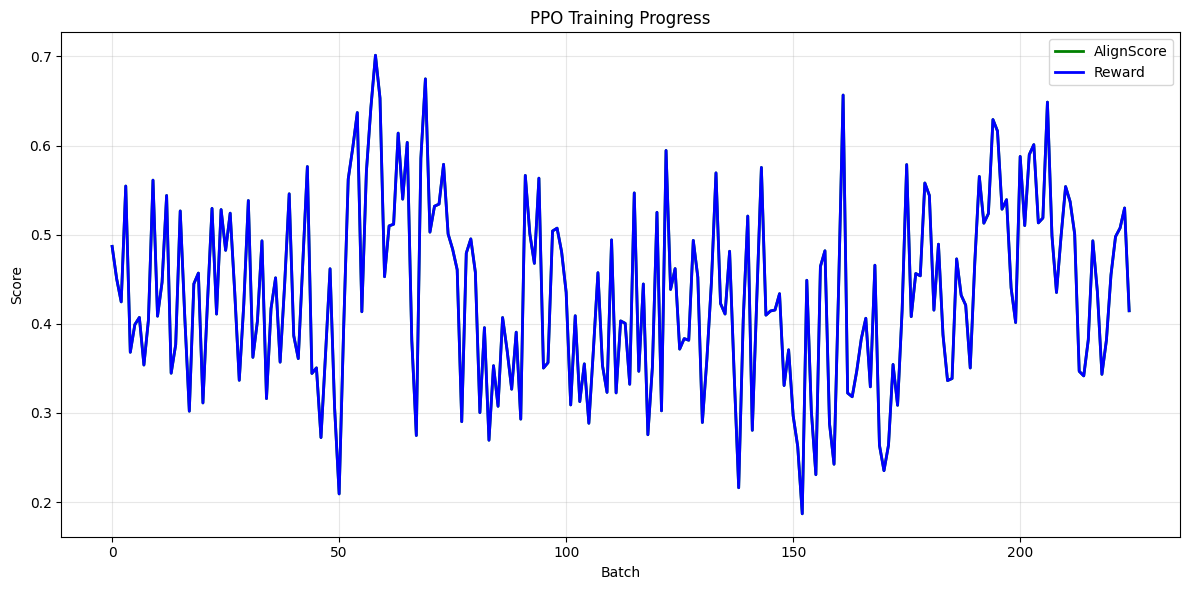


📈 Estadísticas:
   Baseline AlignScore: 0.4869
   Current AlignScore:  0.4146
   Mejora:              -0.0722


In [ ]:
if 'metrics_history' in globals():
    print("✅ metrics_history existe en memoria")

    import pandas as pd
    import matplotlib.pyplot as plt

    # Convertir a DataFrame
    df = pd.DataFrame(metrics_history)

    # Guardar CSV
    df.to_csv('ppo_metrics_simple.csv', index=False)
    print("✅ CSV guardado: ppo_metrics_simple.csv")

    # Mostrar
    print(f"\n📊 Datos disponibles:")
    print(df.head())
    print(f"\nTotal batches: {len(df)}")

    # Gráfica rápida
    plt.figure(figsize=(12, 6))
    plt.plot(df['batch'], df['align_mean'], 'g-', linewidth=2, label='AlignScore')
    plt.plot(df['batch'], df['reward_mean'], 'b-', linewidth=2, label='Reward')
    plt.xlabel('Batch')
    plt.ylabel('Score')
    plt.title('PPO Training Progress')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Stats
    print(f"\n📈 Estadísticas:")
    print(f"   Baseline AlignScore: {df['align_mean'].iloc[0]:.4f}")
    print(f"   Current AlignScore:  {df['align_mean'].iloc[-1]:.4f}")
    print(f"   Mejora:              {df['align_mean'].iloc[-1] - df['align_mean'].iloc[0]:+.4f}")

else:
    print("❌ metrics_history no existe")
    print("   El loop no llegó a inicializarse o el runtime se reinició")

In [ ]:
import os
import torch
import json

output_dir = "./ppo_output"
os.makedirs(output_dir, exist_ok=True)   # 🔥 Asegura que exista la carpeta base

# Buscar versión disponible
version = 1
while True:
    save_path = os.path.join(output_dir, f"model_ppo_finetuned_v{version}")
    if not os.path.exists(save_path):
        break
    version += 1

os.makedirs(save_path, exist_ok=True)     # 🔥 Mejor que sin parámetro

# 1️⃣ Guardar pesos LoRA
torch.save(model.pretrained_model.state_dict(), os.path.join(save_path, "adapter_model.bin"))

# 2️⃣ Guardar configuración LoRA con sets convertidos a listas
if hasattr(model.pretrained_model, "peft_config"):
    peft_dict = model.pretrained_model.peft_config["default"].to_dict()

    # convertir sets a listas
    for k, v in peft_dict.items():
        if isinstance(v, set):
            peft_dict[k] = list(v)

    with open(os.path.join(save_path, "adapter_config.json"), "w") as f:
        json.dump(peft_dict, f, indent=2)

# 3️⃣ Guardar tokenizer
ppo_trainer.tokenizer.save_pretrained(save_path)

print(f"✅ Adaptadores LoRA PPO guardados correctamente en {save_path}")



✅ Adaptadores LoRA PPO guardados correctamente en ./ppo_output/model_ppo_finetuned_v1


In [ ]:
# ============================================
# GUARDAR TODO EL HISTORY EN DRIVE
# ============================================

import pandas as pd
import numpy as np
import json
import os

# Directorio en Drive
save_dir = "/content/drive/MyDrive/PPO_Models/training_history"
os.makedirs(save_dir, exist_ok=True)

print("💾 Guardando history completo en Drive...")
print(f"   Directorio: {save_dir}\n")

# ============================================
# 1. CONVERTIR metrics_history A DATAFRAME
# ============================================

if 'metrics_history' in globals():
    df = pd.DataFrame(metrics_history)

    # Guardar CSV principal
    csv_path = os.path.join(save_dir, "ppo_metrics_complete.csv")
    df.to_csv(csv_path, index=False)
    print(f"✅ CSV guardado: {csv_path}")
    print(f"   Columnas: {list(df.columns)}")
    print(f"   Filas: {len(df)}")

    # ============================================
    # 2. GUARDAR COMO JSON (más detallado)
    # ============================================

    json_path = os.path.join(save_dir, "ppo_metrics_complete.json")
    with open(json_path, 'w') as f:
        json.dump(metrics_history, f, indent=2)
    print(f"\n✅ JSON guardado: {json_path}")

    # ============================================
    # 3. GUARDAR ESTADÍSTICAS RESUMIDAS
    # ============================================

    stats = {
        "total_batches": len(df),
        "batch_size": BATCH_SIZE if 'BATCH_SIZE' in globals() else 4,
        "total_samples": len(df) * (BATCH_SIZE if 'BATCH_SIZE' in globals() else 4),

        "baseline": {
            "align_mean": float(df['align_mean'].iloc[0]),
            "bert_mean": float(df['bert_mean'].iloc[0]),
            "reward_mean": float(df['reward_mean'].iloc[0]),
            "grade_mean": float(df['grade_mean'].iloc[0])
        },

        "final": {
            "align_mean": float(df['align_mean'].iloc[-1]),
            "bert_mean": float(df['bert_mean'].iloc[-1]),
            "reward_mean": float(df['reward_mean'].iloc[-1]),
            "grade_mean": float(df['grade_mean'].iloc[-1])
        },

        "improvement": {
            "align_absolute": float(df['align_mean'].iloc[-1] - df['align_mean'].iloc[0]),
            "align_percent": float((df['align_mean'].iloc[-1] - df['align_mean'].iloc[0]) / df['align_mean'].iloc[0] * 100),
            "reward_absolute": float(df['reward_mean'].iloc[-1] - df['reward_mean'].iloc[0]),
            "reward_percent": float((df['reward_mean'].iloc[-1] - df['reward_mean'].iloc[0]) / df['reward_mean'].iloc[0] * 100)
        },

        "statistics": {
            "align_mean_overall": float(df['align_mean'].mean()),
            "align_std_overall": float(df['align_mean'].std()),
            "align_min": float(df['align_mean'].min()),
            "align_max": float(df['align_mean'].max()),

            "bert_mean_overall": float(df['bert_mean'].mean()),
            "bert_std_overall": float(df['bert_mean'].std()),

            "grade_mean_overall": float(df['grade_mean'].mean()),
            "grade_std_overall": float(df['grade_mean'].std())
        }
    }

    stats_path = os.path.join(save_dir, "ppo_summary_stats.json")
    with open(stats_path, 'w') as f:
        json.dump(stats, f, indent=2)
    print(f"\n✅ Estadísticas guardadas: {stats_path}")

    # ============================================
    # 4. GUARDAR ESTADÍSTICAS EN TXT (legible)
    # ============================================

    txt_path = os.path.join(save_dir, "ppo_summary.txt")
    with open(txt_path, 'w') as f:
        f.write("="*80 + "\n")
        f.write("PPO TRAINING SUMMARY\n")
        f.write("="*80 + "\n\n")

        f.write(f"Total Batches: {stats['total_batches']}\n")
        f.write(f"Batch Size: {stats['batch_size']}\n")
        f.write(f"Total Samples Processed: {stats['total_samples']}\n\n")

        f.write("-"*80 + "\n")
        f.write("BASELINE (Initial)\n")
        f.write("-"*80 + "\n")
        f.write(f"AlignScore:  {stats['baseline']['align_mean']:.4f}\n")
        f.write(f"BERTScore:   {stats['baseline']['bert_mean']:.4f}\n")
        f.write(f"Reward:      {stats['baseline']['reward_mean']:.4f}\n")
        f.write(f"Grade Level: {stats['baseline']['grade_mean']:.2f}\n\n")

        f.write("-"*80 + "\n")
        f.write("FINAL (After PPO)\n")
        f.write("-"*80 + "\n")
        f.write(f"AlignScore:  {stats['final']['align_mean']:.4f}\n")
        f.write(f"BERTScore:   {stats['final']['bert_mean']:.4f}\n")
        f.write(f"Reward:      {stats['final']['reward_mean']:.4f}\n")
        f.write(f"Grade Level: {stats['final']['grade_mean']:.2f}\n\n")

        f.write("-"*80 + "\n")
        f.write("IMPROVEMENT\n")
        f.write("-"*80 + "\n")
        f.write(f"AlignScore:  {stats['improvement']['align_absolute']:+.4f} ({stats['improvement']['align_percent']:+.1f}%)\n")
        f.write(f"Total Reward: {stats['improvement']['reward_absolute']:+.4f} ({stats['improvement']['reward_percent']:+.1f}%)\n\n")

        f.write("-"*80 + "\n")
        f.write("OVERALL STATISTICS\n")
        f.write("-"*80 + "\n")
        f.write(f"AlignScore:  {stats['statistics']['align_mean_overall']:.4f} ± {stats['statistics']['align_std_overall']:.4f}\n")
        f.write(f"   Range: [{stats['statistics']['align_min']:.4f}, {stats['statistics']['align_max']:.4f}]\n\n")
        f.write(f"BERTScore:   {stats['statistics']['bert_mean_overall']:.4f} ± {stats['statistics']['bert_std_overall']:.4f}\n\n")
        f.write(f"Grade Level: {stats['statistics']['grade_mean_overall']:.2f} ± {stats['statistics']['grade_std_overall']:.2f}\n\n")

        f.write("="*80 + "\n")

    print(f"✅ Resumen TXT guardado: {txt_path}")

    # ============================================
    # 5. COPIAR GRÁFICAS
    # ============================================

    import shutil

    graficas = [
        'ppo_training_curves_simple.png',
        'ppo_training_curves.png',
        'my_ppo_analysis.png'
    ]

    for grafica in graficas:
        if os.path.exists(grafica):
            dest = os.path.join(save_dir, grafica)
            shutil.copy2(grafica, dest)
            print(f"\n✅ Gráfica copiada: {dest}")

    # ============================================
    # 6. GUARDAR DATOS RAW (pickle)
    # ============================================

    import pickle

    pickle_path = os.path.join(save_dir, "metrics_history_raw.pkl")
    with open(pickle_path, 'wb') as f:
        pickle.dump(metrics_history, f)
    print(f"\n✅ Pickle guardado: {pickle_path}")

    # ============================================
    # 7. CREAR README
    # ============================================

    readme_path = os.path.join(save_dir, "README.txt")
    with open(readme_path, 'w') as f:
        f.write("PPO TRAINING HISTORY - ARCHIVOS\n")
        f.write("="*80 + "\n\n")
        f.write("DATOS:\n")
        f.write("  - ppo_metrics_complete.csv : Métricas completas por batch (CSV)\n")
        f.write("  - ppo_metrics_complete.json : Métricas completas por batch (JSON)\n")
        f.write("  - metrics_history_raw.pkl : Datos raw en formato pickle\n\n")
        f.write("RESÚMENES:\n")
        f.write("  - ppo_summary_stats.json : Estadísticas resumidas (JSON)\n")
        f.write("  - ppo_summary.txt : Resumen legible (TXT)\n\n")
        f.write("GRÁFICAS:\n")
        f.write("  - ppo_training_curves_simple.png : Gráficas de entrenamiento\n\n")
        f.write("COLUMNAS EN CSV:\n")
        for col in df.columns:
            f.write(f"  - {col}\n")

    print(f"\n✅ README creado: {readme_path}")

    # ============================================
    # RESUMEN FINAL
    # ============================================

    print(f"\n{'='*80}")
    print(f"📦 TODO GUARDADO EN DRIVE")
    print(f"{'='*80}")
    print(f"\n📁 Directorio: {save_dir}")
    print(f"\n📊 Archivos guardados:")

    for item in sorted(os.listdir(save_dir)):
        size = os.path.getsize(os.path.join(save_dir, item))
        size_kb = size / 1024
        print(f"   {item:<40} {size_kb:>8.1f} KB")

    print(f"\n✅ Listo para descargar o analizar más tarde")
    print(f"{'='*80}")

    # Mostrar resumen
    print(f"\n📈 RESUMEN RÁPIDO:")
    print(f"   Total batches: {stats['total_batches']}")
    print(f"   AlignScore: {stats['baseline']['align_mean']:.3f} → {stats['final']['align_mean']:.3f} ({stats['improvement']['align_percent']:+.1f}%)")
    print(f"   BERTScore:  {stats['baseline']['bert_mean']:.3f} → {stats['final']['bert_mean']:.3f}")
    print(f"   Reward:     {stats['baseline']['reward_mean']:.3f} → {stats['final']['reward_mean']:.3f} ({stats['improvement']['reward_percent']:+.1f}%)")

else:
    print("❌ metrics_history no existe en memoria")
    print("   No hay datos para guardar")


💾 Guardando history completo en Drive...
   Directorio: /content/drive/MyDrive/PPO_Models/training_history

✅ CSV guardado: /content/drive/MyDrive/PPO_Models/training_history/ppo_metrics_complete.csv
   Columnas: ['batch', 'reward_mean', 'reward_std', 'align_mean', 'align_std', 'bert_mean', 'bert_std', 'grade_mean', 'grade_std']
   Filas: 225

✅ JSON guardado: /content/drive/MyDrive/PPO_Models/training_history/ppo_metrics_complete.json

✅ Estadísticas guardadas: /content/drive/MyDrive/PPO_Models/training_history/ppo_summary_stats.json
✅ Resumen TXT guardado: /content/drive/MyDrive/PPO_Models/training_history/ppo_summary.txt

✅ Pickle guardado: /content/drive/MyDrive/PPO_Models/training_history/metrics_history_raw.pkl

✅ README creado: /content/drive/MyDrive/PPO_Models/training_history/README.txt

📦 TODO GUARDADO EN DRIVE

📁 Directorio: /content/drive/MyDrive/PPO_Models/training_history

📊 Archivos guardados:
   README.txt                                    0.6 KB
   metrics_history_raw

Prueba de generación para ver que se genera de forma adecuada

In [ ]:
import textwrap
import random
import re
import torch

# -----------------------------
# 1) Tomamos un ejemplo aleatorio
# -----------------------------
sample = ppo_data[random.randint(0, len(ppo_data)-1)]

# -----------------------------
# 2) Extraer abstract del prompt
# -----------------------------
def extract_abstract(prompt):
    return (
        prompt.split("Input abstract:", 1)[-1]
              .split("Output PLS:", 1)[0]
              .strip()
    )

abstract = extract_abstract(sample["prompt"])

# -----------------------------
# 3) Construir prompt igual que en PPO
# -----------------------------
prompt_text = INSTR_PROMPT.format(source=abstract)

# -----------------------------
# 4) Tokenizar
# -----------------------------
inputs = tokenizer(
    prompt_text,
    return_tensors="pt",
    truncation=True,
    max_length=4096, ###
).to(next(model.parameters()).device)

# -----------------------------
# 5) Generación
# -----------------------------
response_tensors = ppo_trainer.model.generate(
    **inputs,
    max_new_tokens=128,
    temperature=0.7,
    top_p=0.9,
    do_sample=True,
    pad_token_id=tokenizer.eos_token_id,
    use_cache=False
)

generated_raw = tokenizer.decode(response_tensors[0], skip_special_tokens=True)

# -----------------------------
# 6) Limpiar a partir de "### Output PLS:"
# -----------------------------
def clean_generated(text):
    pattern = r"###\s*Output\s*PLS\s*:?\s*(.*)"
    match = re.search(pattern, text, flags=re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else text.strip()

generated_clean = clean_generated(generated_raw)

# -----------------------------
# 7) Imprimir con ancho 120
# -----------------------------
wrapper = textwrap.TextWrapper(width=120)

print("\n" + "="*120)
print("PROMPT:")
print("="*120)
print("\n".join(wrapper.wrap(prompt_text)))

print("\n" + "="*120)
print("GENERATED TEXT (raw):")
print("="*120)
print("\n".join(wrapper.wrap(generated_raw)))

print("\n" + "="*120)
print("GENERATED TEXT (clean):")
print("="*120)
print("\n".join(wrapper.wrap(generated_clean)))



PROMPT:
Using the following abstract of a biomedical study as input, generate a Plain Language Summary (PLS) understandable by
any patient, regardless of their health literacy. Ensure that the generated text adheres to the following instructions
which should be followed step-by-step: a. Specific Structure: The generated PLS should be presented in a logical order,
using the following order: 1. Plain Title 2. Rationale 3. Trial Design 4. Results b. Sections should be authored
following these parameters: 1. Plain Title: Simplified title understandable to a layperson that summarizes the research
that was done. 2. Rationale: Include: background or study rationale providing a general description of the condition,
what it may cause or why it is a burden for the patients; the reason and main hypothesis for the study; and why the
study is needed, and why the study medication has the potential to treat the condition. 3. Trial Design: Answer 'How is
this study designed?' Include the description 

Guardar los Modelos

In [ ]:
# Initialize AlignScore with CORRECT API
    # device must be an INTEGER: 0 for cuda:0, 1 for cuda:1, -1 for CPU
device_id = 0 if torch.cuda.is_available() else -1

'''align_scorer = AlignScore(
        model='roberta-base',
        batch_size=32,
        device=device_id,  # INTEGER, not string!
        ckpt_path='https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt',
        evaluation_mode='nli_sp',
        verbose=False
    )
'''

device_name = f"cuda:{device_id}" if device_id >= 0 else "cpu"
print(f"✓ AlignScore model loaded on {device_name}!")

# Quick functionality test
contexts = ["The sky is blue during the day."]
claims = ["The sky has a blue color."]
scores = align_scorer.score(contexts=contexts, claims=claims)


print(f"✓ AlignScore working! Test score: {scores[0]:.4f}")
print(scores)
print("\n🎉 SUCCESS! AlignScore is ready to use with PyTorch 2.x")

✓ AlignScore model loaded on cuda:0!
✓ AlignScore working! Test score: 0.9576
[0.9576256275177002]

🎉 SUCCESS! AlignScore is ready to use with PyTorch 2.x


In [ ]:
import trl
print(trl.__version__)

0.9.6
